# Coding a simple perceptron with Backprop

In [1]:
import github_command as gt

In [164]:
gt.push(file_to_transfer="BONUS_A_Simple_NN_for_a_Simple_LR.ipynb",
        message="Added bias update", repos="TDs_ESILV.git")

In [14]:
import os, numpy as np

<img src="td4_ressources/img_perceptron_towards_data_science.png" width=500>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

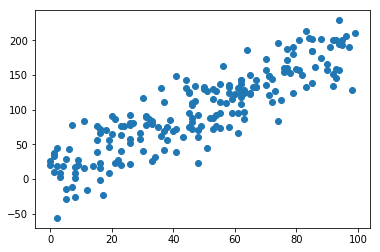

In [97]:
random_values = np.random.randint( 0,100, (200, 1))
X, y = random_values, 2*random_values + np.random.normal(0, 30, size=(200,1))  # y = 2*x + epsilon with epsilon ~ N(0,1)
plt.scatter(x=X,y=y)

In [100]:
X.reshape((200,))

array([93, 27, 18, 46,  3, 62, 24, 36,  0, 50,  8, 95, 98, 88, 59, 77, 61,
        1, 48, 46, 36, 48, 16,  2, 26, 65, 26,  9, 88, 41, 19, 63, 37, 39,
       60, 33, 12,  6, 62, 92,  2, 83, 15, 26, 31, 71, 65, 55,  8, 34, 41,
       90, 16, 44,  2,  4, 62, 58, 23, 82, 26,  5, 55, 55, 75, 44, 15, 46,
       19, 70, 64, 48, 30, 79, 63, 61,  8, 72, 23, 54, 38, 78, 29, 54, 11,
       86, 20, 92,  8, 46, 76, 62, 79, 90, 96, 80, 94, 16,  3, 45, 46, 62,
       29, 62, 32, 17, 94, 45, 70, 92, 26, 81, 23, 15, 41, 67, 59, 19, 93,
       70, 45, 53,  0,  9, 37, 47, 61, 21, 52, 99, 79, 81, 50, 26, 77,  5,
       65, 84, 76,  1, 58, 83, 53, 67, 40, 31, 93, 95,  1, 53, 22, 16, 20,
        5, 48, 85, 71, 71, 21, 38, 23, 73, 91, 94, 51, 97, 77,  7, 56, 58,
       33, 72, 45, 66, 74,  7, 55, 53, 31, 85, 47, 58, 63, 43, 33, 37, 49,
       54, 57, 67, 11, 63, 35, 14, 85, 74, 16, 85, 51, 30])

In [101]:
pd.DataFrame({"X":  X.reshape((200,)), 'y': y.reshape((200,))})

,X,y
0,93,145.931790
1,27,80.173902
2,18,71.298260
3,46,71.420844
4,3,8.391260
...,...,...
195,74,82.976088
196,16,-1.881656
197,85,202.149811
198,51,44.381436


In [113]:
np.random.random_integers(-2,2, (1,))

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(-2, 2 + 1) instead
  """Entry point for launching an IPython kernel.


array([-2])

In [117]:
weight = np.random.randint(-2,2, (X.shape[1],))

In [121]:
b= np.random.randint(0,10)

In [290]:
w =np.random.randint(-2,2,(1,1))

In [295]:
y

array([[145.93178982],
       [ 80.17390217],
       [ 71.29825975],
       [ 71.42084411],
       [  8.39126007],
       [142.34683809],
       [ 76.31820435],
       [ 61.61841695],
       [ 19.79571225],
       [132.3672977 ],
       [  1.89991732],
       [192.52945117],
       [128.18121876],
       [175.05857274],
       [115.29118304],
       [171.65133423],
       [ 65.91903326],
       [  9.89344311],
       [ 23.68512365],
       [ 88.12458562],
       [130.55395279],
       [ 60.48065131],
       [ 72.62927998],
       [ 44.0689104 ],
       [ 57.97472405],
       [150.04099997],
       [ 92.40688193],
       [ 19.77886399],
       [201.47740337],
       [ 39.2361096 ],
       [  8.51393659],
       [124.58870683],
       [ 68.93477238],
       [ 84.91891424],
       [122.22741059],
       [ 83.77499462],
       [-15.28511625],
       [ 43.73068227],
       [142.90841437],
       [150.91538568],
       [-55.86767788],
       [132.27923101],
       [ 38.75981237],
       [ 22

np.dot(X, weight) + b


<img src="td4_ressources/img_formula_gradient_descent_backprop_mattmazur.png" width=600>

In [387]:
class Neural_Network_1neuron:
    import numpy as np, pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    
    def __init__(self, X, y, nb_epochs=100):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.20)
        self.X_train, self.X_test = self.scale_values(self.X_train, self.X_test)
        
        self.weights = [] * X.shape[1]  # as many weights as features, here 1
        self.weights = self.init_weights(X)
        self.bias    = np.random.randint(-10, 10)
        self.training_predictions, self.mse = 0, 0
        self.learning_rate = 0.01
        self.nb_epochs = nb_epochs
        self.weights_update, self.bias_update = 0, 0
        self.records = pd.DataFrame([[self.weights, self.bias,0]], columns=['weights', 'bias', 'mse'])
    
    def scale_values(self, X_train, X_test):
        scale   = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test  = scale.transform(X_test)
        return X_train, X_test
        
    def init_weights(self, X):
        nb_of_features_input = X.shape[1]
        return np.random.randint(-2,2, (nb_of_features_input, 1))
    
    def activation(self):
        return x
    def derivate_activation(self):
        return 1
    
    def forward_pass(self):
        self.training_predictions = np.dot(self.X_train, self.weights) + self.bias
    
    def compute_mse(self):
        self.mse = 1/(2*len(self.X_train)) * sum( ( self.training_predictions - self.y_train)**2 )
    
    def backpropagation(self):
        # derivative of error by weights so to update them along with bias
        # dE/dw = dE/da * da/dz * dz/dw
        # w = w - n*dE/dw
        # E = mse = (1/2n)* sum(( predictions(==activations) - target)**2) ON ALL TRAINING EXAMPLES
        
        dE_da = self.training_predictions - self.y_train #for all training examples
        da_dz = self.derivate_activation() # derivate of activation
        
        dz_dw = self.X_train     # z = W*X + bias => dz_dw = X    
        
        
        self.weights_update, self.bias_update = \
            ( 1 / self.X_train.shape[0] ) * sum( dE_da * da_dz * dz_dw),\
            ( 1 / self.X_train.shape[0] ) * sum( dE_da * da_dz ) # weights updates, bias update
    
    def update(self):
        self.weights = self.weights - self.learning_rate * self.weights_update
        self.bias    = self.bias    - self.learning_rate * self.bias_update
    
    def predict(self):
        return np.dot(self.X_test, self.weights) + self.bias
    
    def run(self):
        for i in range(1, self.nb_epochs):
            self.forward_pass()
            self.compute_mse()
            self.backpropagation()
            self.update()
            self.records.loc[i] = [self.weights, self.bias, self.mse]  
        return self.records

In [388]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=2000)

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [389]:
records= unReseauDeNeurone.run()

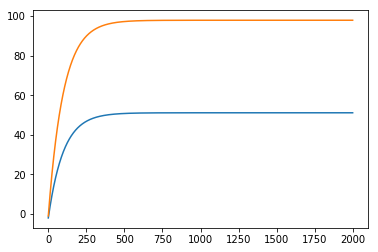

In [406]:
plt.plot(records['weights'])
plt.plot(records['bias'])

In [ ]:
from sklearn.preprocessing import StandardScaler
x_ = np.linspace(0, 120, 100).reshape((100,1))
y_ = float(unReseauDeNeurone.weights)*StandardScaler().fit_transform(x_) + float(unReseauDeNeurone.bias)
plt.plot(x_, y_, color='red')

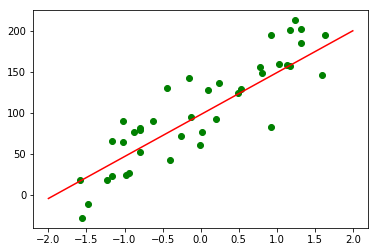

In [424]:
#plt.scatter(x=unReseauDeNeurone.X_test, y=unReseauDeNeurone.predict())
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green')

x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(unReseauDeNeurone.weights)*x_ + float(unReseauDeNeurone.bias)
plt.plot(x_, y_, color='red')

In [355]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [254]:
test = pd.DataFrame([[0,0,0]], columns=['weights', 'bias', 'mse'])

In [267]:
test

,weights,bias,mse
0,0,0,0
-1,2,3,4
1,2,3,4


In [279]:
np.dot( y, X)

ValueError: shapes (200,1) and (200,1) not aligned: 1 (dim 1) != 200 (dim 0)